<a href="https://colab.research.google.com/github/lanyu0322/phd_semester1/blob/master/ggd_concessions_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
!pip install geopandas

In [0]:
import pandas as pd
import geopandas as gp

In [0]:
fname = "drive/My Drive/lwir/data/food_truck/DPR_Concessions_001.json"

In [0]:
# dpr_con = gp.read_file(fname)
dpr_con = pd.read_json(fname)

In [158]:
dpr_con

,name,location,park_id,permit_start_date,permit_end_date,permit_number,description,type,emails,phones,websites,locations
0,Alley Pond Golf Center,232-01 Northern Boulevard,Q001,2010-11-01,2025-10-31,Q1-DR,"Alley Pond Golf Center\r\n74 Hitting Stations,...",Driving Range,{'email': []},{'phone': ['(718) 225-9187']},{'website': []},"{'location': [{'lat': '40.765294', 'lng': '-73..."
1,Alley Pond Tennis Center,79-20 Winchester Boulevard,Q001,2010-11-16,2022-10-10,Q1-A-SB-IT,"The Alley Pond Tennis Center, operated by form...",Tennis Facility,{'email': ['info@alleypondtenniscenter.com']},{'phone': ['(718) 264-2600 ']},{'website': ['http://www.alleypondtenniscenter...,"{'location': [{'lat': '40.739339', 'lng': '-73..."
2,Arthur Kill Road Restaurant,Arthur Kill Road & Richmond Avenue,R013,None,None,R13-R,None,Restaurant,{'email': []},{'phone': []},{'website': []},"{'location': [{'lat': '40.561066', 'lng': '-74..."
3,Astoria Pool Snack Bar,Astoria Pool,Q004,2012-07-06,2020-09-06,Q4-SB,None,Snack Bar,{'email': ['surfshackny@yahoo.com']},{'phone': []},{'website': ['https://surfshackny.wix.com/surf...,"{'location': [{'lat': '40.779108', 'lng': '-73..."
4,Battery Gardens Restaurant,1 Battery Park Plaza,M005,2004-01-16,2020-01-07,M5-F-R,None,Restaurant,{'email': ['alex@batterygardens.com']},{'phone': ['(212) 809-5508']},{'website': ['http://www.batterygardens.com/']},"{'location': [{'lat': '40.701423', 'lng': '-74..."
...,...,...,...,...,...,...,...,...,...,...,...,...
103,War Memorial Ice Skating Rink,"Victory Boulevard, west of Clove Road",R005,2011-10-01,2026-09-30,"R5-A-IS,SB",None,Ice Skating Rink,{'email': []},{'phone': ['(718) 720-1010']},{'website': []},"{'location': [{'lat': '40.615824', 'lng': '-74..."
104,Wendy's,19 West 170th Street,X058,2005-11-01,2020-10-31,X58-R,Wendy's in Keltch Memorial Park is located on ...,Snack Bar,{'email': []},{'phone': ['(718) 681-0483']},{'website': []},"{'location': [{'lat': '40.840534', 'lng': '-73..."
105,Wollman & Lasker Ice Skating Rinks,Wollman Rink: Center Drive at 63rd Street; Las...,M010,2001-11-01,2021-04-30,M10-(5)-A-IS,None,Ice Skating Rink,{'email': ['dklied@trumporg.com']},{'phone': ['(212) 439-6900']},{'website': ['http://www.wollmanskatingrink.co...,"{'location': [{'lat': '40.767807', 'lng': '-73..."
106,World Ice Arena (Flushing Meadows Ice Skating ...,Flushing Meadows Park Perimeter Road between t...,Q099,2009-02-07,2029-02-06,Q99-IS,"Located in Flushing Meadows Corona Park, home ...",Ice Skating Rink,{'email': []},{'phone': ['(718) 760-9001']},{'website': ['http://worldice.pucksystems.com/']},"{'location': [{'lat': '40.751901', 'lng': '-73..."


In [0]:
parks = gp.read_file("drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp")

In [160]:
parks

,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,gisobjid,gispropnum,global_id,jurisdicti,location,mapped,name311,nys_assemb,nys_senate,objectid,omppropid,parentid,permit,permitdist,permitpare,pip_ratabl,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
0,19440801000000.00000,0.991,None,M,PLGD,20100106000000.00000,111,9,M-11,Abraham Lincoln Playground,100004131.0,M193,{5D62AD38-AE30-4E43-8DE0-E28780CD8E3C},DPR,5 Ave. and E. 135 St.,False,Abraham Lincoln Playground,70,30,5834.0,M193,M-11,Y,M-11,M-11,Yes,25,False,Abraham Lincoln Playground,Neighborhood Plgd,Community Park,http://www.nycgovparks.org/parks/M193/,13,No,10037,"POLYGON ((-73.93683 40.81185, -73.93684 40.811..."
1,None,0.030,None,Q,PARK,20090423000000.00000,413,23,Q-13,Father Reilly Square,100000216.0,Q159,{12B62C23-3F42-418E-B059-F0B549D7FCEB},DPR/CDOT,"Winchester Blvd., 93 Ave., 220 St.",False,Father Reilly Square,33,14,6166.0,Q159,Q-13,Y,Q-13,Q-13,Yes,105,False,Father Reilly Square,Sitting Area/Triangle/Mall,Triangle/Plaza,http://www.nycgovparks.org/parks/Q159/,5,No,11428,"POLYGON ((-73.73628 40.72268, -73.73609 40.722..."
2,19360824000000.00000,0.911,2300 Ryer Avenue,X,PARK,20100106000000.00000,205,15,X-05,Slattery Playground,100004208.0,X085,{01AD9F2D-AD1B-4FBE-BB15-41DC9DC485FD},DPR,E. 183 St. bet. Valentine Ave. and Ryer,False,Slattery Playground,86,33,4792.0,X085,X-05,Y,X-05,X-05,Yes,46,False,Slattery Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/X085/,15,No,10458,"POLYGON ((-73.89825 40.85693, -73.89894 40.857..."
3,19520206000000.00000,0.189,349 RODNEY STREET,B,PARK,20100106000000.00000,301,34,B-01,Rodney Playground Center,100003716.0,B223PD,{F14C1976-8BEC-49F1-A139-798EA720A52E},DPR,"Rodney St., S. 3 St., Borniquen Pl.",True,Rodney Playground Center,53,18,5124.0,B223PD,B-01,Y,B-01,B-01,Yes,90,False,Rodney Playground Center,Sitting Area/Triangle/Mall,Neighborhood Park,http://www.nycgovparks.org/parks/B223PD/,7,No,11211,"POLYGON ((-73.95533 40.71042, -73.95556 40.710..."
4,19240403000000.00000,0.554,124 11 STREET,B,PARK,20110712000000.00000,306,39,B-06,Ennis Playground,100004454.0,B095,{B2FA7ABF-7ECB-4847-8979-0DD773A819F8},DPR,"11 St., 12 St. bet. 2 Ave. and 3 Ave.",False,Ennis Playground,51,25,5456.0,B095,B-06,Y,B-06,B-06,Yes,78,False,Ennis Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/B095/,7,No,11215,"POLYGON ((-73.99425 40.67058, -73.99385 40.671..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,20180806000000.00000,0.563,None,B,PARK,None,301,33,B-01,None,0.0,B595,{08A348D1-7A17-4A32-8668-F9241F93A539},DPR,Commercial St. bet. Franklin St. and Clay St.,None,None,50,18,76492.0,B595,None,None,None,None,No,None,False,Greenpoint Landing,None,Neighborhood Park,None,12,Yes,11222,"POLYGON ((-73.95929 40.73711, -73.95936 40.737..."
2007,18640615000000.00000,526.250,None,B,PARK,None,"306, 307, 314, 309, 308",39,B-19,Prospect Park,100004003.0,B073,{2E313F13-E826-45C6-8E10-C342CDE4D9A9},DPR,"Prospect Park W, Parkside Ave. bet. Flatbush A...",False,Prospect Park,44,21,69238.0,B073,B-19,Y,B-19,B-19,No,78,False,Prospect Park,Flagship Park,Flagship Park,http://www.nycgovparks.org/parks/B073/,9,No,11215,"POLYGON ((-73.96881 40.67189, -73.96867 40.671..."
2008,20050630000000.00000,0.096,114 WARREN STREET,M,PARK,20100106000000.00000,101,1,M-01,Tribeca Dog Run,100004227.0,M366,{EF9A8A19-2561-4549-8583-22EA08792D9F},DPR,Warren St. bet. Greenwich St. and West St.,False,Tribeca Dog Run,66,26,4749.0,M366,M-01,Y,M-01,M-01,No,1,False,Tribeca Dog Run,Neighborhood Park,Recreation Field/Courts,http://www.nycgovparks.org/parks/M366/,10,No,10007,"POLYGON ((-74.01217 40.71633, -74.01195 40.716..."
2009,20151231000000.00000,0.230,140 WEST 20 STREET,M,PARK,None,104,3,M-04,None,100024341.0,M402,{8BD009AF-5DB0-41D1-ABDF-83C9067D6AB1},DPR,W. 20 St. be

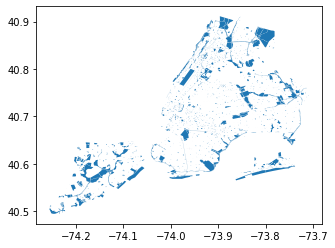

In [161]:
parks.plot()

In [0]:
parks["lon"] = parks["geometry"].centroid.x
parks["lat"] = parks["geometry"].centroid.y

In [163]:
dpr_con[dpr_con["park_id"].isin(parks["gispropnum"]) == False]

,name,location,park_id,permit_start_date,permit_end_date,permit_number,description,type,emails,phones,websites,locations
57,Major Deegan Expressway Gas Station,"Major Deegan Expressway (Northbound), near the...",M100,2008-07-01,2023-06-30,X150-A-GS,None,Gas Station,{'email': []},{'phone': []},{'website': []},"{'location': [{'lat': '40.895115', 'lng': '-73..."
58,Major Deegan Expressway Gas Station,"Major Deegan Expressway (Southbound), near the...",M100,2008-07-01,2023-06-30,X150-GS,None,Gas Station,{'email': []},{'phone': []},{'website': []},"{'location': [{'lat': '40.894928', 'lng': '-73..."


In [0]:
# -- GGD: we are losing to rows b/c M100 is not in the parks properties file
dpr_con = dpr_con.merge(parks[["gispropnum", "lon", "lat"]], left_on="park_id", right_on="gispropnum")

In [165]:
type(dpr_con["locations"].iloc[0])

dict

In [166]:
(dpr_con["locations"].apply(lambda x: len(x["location"])) > 1).sum()

7

In [0]:
lons = []
lats = []

import numpy as np


for ii in range(len(dpr_con)):
  rec = dpr_con["locations"].iloc[ii]
  lls = rec["location"]

  for jj in range(len(lls)):
    lons.append(-np.abs(float(lls[jj]["lng"])))
    lats.append(float(lls[jj]["lat"]))

lons = np.array(lons)
lats = np.array(lats)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dpr_eat = pd.read_json("drive/My Drive/lwir/data/food_truck/DPR_Eateries_001.json")

In [0]:
# -- GGD: we may be losing some for the same reason as above
dpr_eat = dpr_eat.merge(parks[["gispropnum", "lon", "lat"]], left_on="park_id", right_on="gispropnum")

In [171]:
dpr_eat

,name,location,park_id,start_date,end_date,description,permit_number,phone,website,type_name,gispropnum,lon,lat
0,Central Park Food Cart,At the entrance to the path leading to the Pon...,M010,2014-01-01,2018-12-31,None,M10-E61-ED-C,None,None,Food Cart,M010,-73.965558,40.782484
1,Central Park Food Cart,"Central Park Mall Area, northwest side of the ...",M010,2015-06-20,2019-12-31,None,M10-72-1A-C,None,None,Food Cart,M010,-73.965558,40.782484
2,Central Park Food Cart,"West 72 Street path, west of Daniel Webster",M010,2015-09-12,2019-12-31,None,M10-72-3-C,None,None,Food Cart,M010,-73.965558,40.782484
3,Central Park Food Cart,East Drive and 72 Street,M010,2015-06-27,2019-12-31,None,M10-72-ED-C,None,None,Food Cart,M010,-73.965558,40.782484
4,Central Park Food Cart,"West Drive, between West 74 and West 75 streets",M010,2015-04-30,2019-12-31,None,M10-74-WD-C,None,None,Food Cart,M010,-73.965558,40.782484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Adameric Cart,Western Border of Cobblestone Plaza,M007,2013-03-24,2018-03-23,None,M007-CG,None,None,Specialty Cart,M007,-74.013658,40.704945
228,Wafels & Dinges,Eastern Plaza of City Hall,M013,2012-08-29,2017-08-28,None,M13-CG,None,None,Specialty Cart,M013,-74.006157,40.712805
229,CC Moore Homestead Park Fruit and Vegetable Cart,"Broadway, between Elmhurst & Britton Ave.",Q361,2010-04-21,2014-12-31,None,Q361-GR,(212) 879-0244,None,Fruit & Vegetable Cart,Q361,-73.882397,40.742142
230,Owen Dolen Fruit and Vegetable Cart,"E. Tremont Ave., Westchester Ave., and Lane Ave.",X016,2011-09-07,2014-12-31,None,X16-GR,None,None,Fruit & Vegetable Cart,X016,-73.842865,40.840549


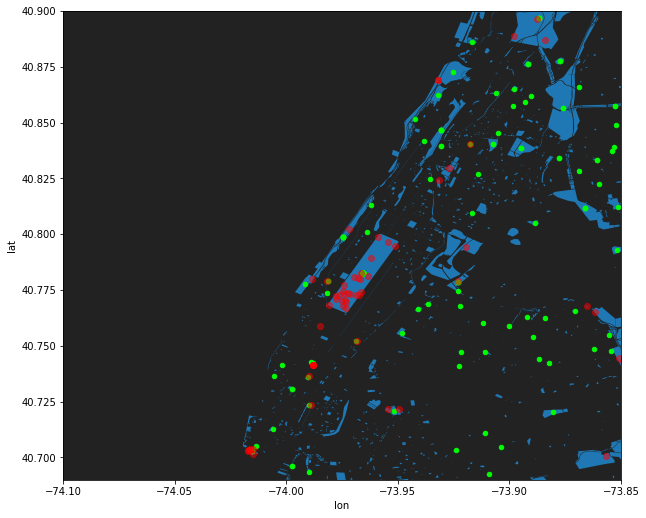

In [172]:
ax = parks.plot(figsize=(10, 10))
dpr_eat.plot.scatter("lon", "lat", c="lime", ax=ax)
ax.set_ylim(40.69, 40.9)
ax.set_xlim(-74.1, -73.85)
ax.plot(lons, lats, "o", color="red", alpha=0.5)
ax.set_facecolor("#222222")
# plt.plot(lons, lats, "o", color="red")

In [173]:
lats[lons > 0]

array([], dtype=float64)

In [174]:

# -- read the data
food_name = os.path.join("drive", "My Drive", "lwir", "data", "food_truck", "DOHMH_New_York_City_Restaurant_Inspection_Results.csv")
restaurant = pd.read_csv(food_name)
restaurant.head()


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50014069,RED LOBSTER,Manhattan,261,W 125TH ST,10027.0,2122801930,Seafood,03/26/2018,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,23.0,NaN,NaN,11/26/2019,Cycle Inspection / Initial Inspection,40.809827,-73.950336,110.0,9.0,22200.0,1089941.0,1.019310e+09,MN11
1,50000419,NATUREWORKS,Manhattan,43-45,W 55 STREET,10019.0,2123333020,American,08/05/2019,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,37.0,NaN,NaN,11/26/2019,Cycle Inspection / Initial Inspection,40.762279,-73.976363,105.0,4.0,10400.0,1034820.0,1.012710e+09,MN17
2,50052197,TERRACE WEST,Brooklyn,3052-3078,W 21ST ST,11224.0,9173049069,American,08/18/2017,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,N,4.0,A,08/18/2017,11/26/2019,Pre-permit (Operational) / Initial Inspection,40.573493,-73.987441,313.0,47.0,35200.0,3189655.0,3.070710e+09,BK21
3,50063522,CECCONI'S,Brooklyn,55,WATER ST,11201.0,6462152136,Italian,07/10/2017,Violations were cited in the following area(s).,04N,Filth flies or food/refuse/sewage-associated (...,Y,8.0,NaN,NaN,11/26/2019,Pre-permit (Operational) / Initial Inspection,40.703294,-73.992047,302.0,33.0,2100.0,3000019.0,3.000260e+09,BK38
4,50087131,VICTORIA G'S PIZZERIA,Queens,8905,METROPOLITAN AVE,11374.0,7186852250,Pizza,05/28/2019,Violations were cited in the following area(s).,16B,The original nutritional fact labels and/or in...,N,NaN,NaN,NaN,11/26/2019,Trans Fat / Initial Inspection,40.712156,-73.861772,405.0,30.0,63700.0,4437647.0,4.031760e+09,QN19


In [175]:
ind_2017 = restaurant["INSPECTION DATE"].str.contains("2017")
restaurant_2017 = restaurant[ind_2017]
print(restaurant_2017)
ind_manhattant = restaurant["BORO"].str.contains("Manhattan")
restaurant_2017_manhattan = restaurant_2017[ind_manhattant]
print("")
print(restaurant_2017_manhattan)


           CAMIS                     DBA  ...           BBL   NTA
2       50052197            TERRACE WEST  ...  3.070710e+09  BK21
3       50063522               CECCONI'S  ...  3.000260e+09  BK38
12      50001697      THE SWEET SHOP NYC  ...  1.014670e+09  MN31
14      40402717  THE WEBSTER APARTMENTS  ...  1.007320e+09  MN13
21      50066938           SIMCHA PALACE  ...  4.066630e+09  QN37
...          ...                     ...  ...           ...   ...
396932  50053135     SUZY'S ROTI PARLOUR  ...  3.050700e+09  BK42
396942  41262775                 KELLY'S  ...  1.003978e+09  MN22
396945  41282827            HAPPY GARDEN  ...  4.005920e+09  QN71
396946  50067644   NIEVES TIA MIMI ICEES  ...  4.015100e+09  QN29
396948  50033289          CARLO'S BAKERY  ...  1.010320e+09  MN15

[85406 rows x 26 columns]

           CAMIS                     DBA  ...           BBL   NTA
12      50001697      THE SWEET SHOP NYC  ...  1.014670e+09  MN31
14      40402717  THE WEBSTER APARTMENTS  ...  1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [176]:
inspection_date_manhattan = restaurant_2017_manhattan.groupby("INSPECTION DATE").count()
print(inspection_date_manhattan)
ind_camera = inspection_date_manhattan.index
print("")
print(ind_camera)

                 CAMIS  DBA  BORO  BUILDING  ...  Census Tract  BIN  BBL  NTA
INSPECTION DATE                              ...                             
01/03/2017         145  145   145       145  ...           143  143  145  143
01/04/2017          63   63    63        63  ...            63   63   63   63
01/05/2017          86   86    86        86  ...            86   86   86   86
01/06/2017          82   82    82        82  ...            80   80   82   80
01/09/2017          97   97    97        97  ...            97   97   97   97
...                ...  ...   ...       ...  ...           ...  ...  ...  ...
12/22/2017          63   63    63        63  ...            63   63   63   63
12/26/2017         229  229   229       229  ...           226  226  229  226
12/27/2017         204  204   204       204  ...           195  195  204  195
12/28/2017         200  200   200       200  ...           199  199  200  199
12/29/2017          63   63    63        63  ...            63  

In [177]:
#subset restaurant in valid date
#june
temp_06_28 = restaurant_2017_manhattan["INSPECTION DATE"].str.contains("06/28/2017")
temp_06_29 = restaurant_2017_manhattan["INSPECTION DATE"].str.contains("06/29/2017")
temp_06_30 = restaurant_2017_manhattan["INSPECTION DATE"].str.contains("06/30/2017")

restaurant_2017_manhattan["month"] = [int(i[:2]) for i in restaurant_2017_manhattan["INSPECTION DATE"]]
print(restaurant_2017_manhattan)
temp_07 = restaurant_2017_manhattan["month"] == 7
temp_08 = restaurant_2017_manhattan["month"] == 8
temp_09 = restaurant_2017_manhattan["month"] == 9
print(temp_07)
temp_date_06_28 = restaurant_2017_manhattan[temp_06_28]
temp_date_06_29 = restaurant_2017_manhattan[temp_06_29]
temp_date_06_30 = restaurant_2017_manhattan[temp_06_30]
temp_july = restaurant_2017_manhattan[temp_07]
temp_aug = restaurant_2017_manhattan[temp_08]
temp_sept = restaurant_2017_manhattan[temp_09]
print(temp_july)
print("")
# Sept date need further process
#temp_sept["day"] = [int(i[2:4]) for i in temp_sept["INSPECTION DATE"]] # not worked since invalid literal for int() with base 10: '09/1'
temp_sept["date"] = temp_sept["INSPECTION DATE"].str.replace("/","")
temp_sept["day"] = [int(i[2:4]) for i in temp_sept["date"]]
print(temp_sept)
temp_sept_day = temp_sept["day"] < 12
temp_sept_final = temp_sept[temp_sept_day]
print("")
print(temp_sept_final)


           CAMIS                     DBA       BORO  ...           BBL   NTA  month
12      50001697      THE SWEET SHOP NYC  Manhattan  ...  1.014670e+09  MN31      5
14      40402717  THE WEBSTER APARTMENTS  Manhattan  ...  1.007320e+09  MN13      5
22      50001446   BENTO SUSHI & NOODLES  Manhattan  ...  1.013170e+09  MN19      5
32      40795021          TAO RESTAURANT  Manhattan  ...  1.012930e+09  MN17     12
38      41151989      WIMPY'S RESTAURANT  Manhattan  ...  1.021280e+09  MN36     12
...          ...                     ...        ...  ...           ...   ...    ...
396889  40389504              DALLAS BBQ  Manhattan  ...  1.014270e+09  MN31      7
396915  50005848                  IPPUDO  Manhattan  ...  1.005550e+09  MN22     11
396930  50058630             MADAME VO'S  Manhattan  ...  1.004510e+09  MN22      3
396942  41262775                 KELLY'S  Manhattan  ...  1.003978e+09  MN22     12
396948  50033289          CARLO'S BAKERY  Manhattan  ...  1.010320e+09  MN15

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

           CAMIS                             DBA  ...   NTA month
145     50065223  CANTINA TAQUERIA & TEQUILA BAR  ...  MN03     7
173     50033071                 GABY RESTAURANT  ...  MN17     7
312     41478428   BARD BASEMENT FACULTY KITCHEN  ...  MN36     7
374     41481394                  GRAMERCY GRILL  ...  MN21     7
430     50060492                      FRESH LEAF  ...  MN17     7
...          ...                             ...  ...   ...   ...
396717  40396381                     LA DINASTIA  ...  MN36     7
396815  50040181                           AS IS  ...  MN15     7
396863  50048348                  SIDE PARK CAFE  ...  MN33     7
396883  50000491                EMPIRE HOTEL BAR  ...  MN14     7
396889  40389504                      DALLAS BBQ  ...  MN31     7

[3159 rows x 27 columns]

           CAMIS                            DBA  ...      date day
149     40849391                          ENNJU  ...  09142017  14
192     41480432                   GINO'S PIZZA

In [190]:
df1 = pd.DataFrame(temp_date_06_28)
df2 = pd.DataFrame(temp_date_06_29)
df3 = pd.DataFrame(temp_date_06_30)
df4 = pd.DataFrame(temp_july)
df5 = pd.DataFrame(temp_aug)
df6 = pd.DataFrame(temp_sept_final)
restaurant_camera_period = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)

restaurant_camera_period.head()

# this file has duplicated restaurant
# camis = restaurant_camera_period.groupby("CAMIS").count()
# print(camis)
# restaurant_camera = restaurant_camera_period(camis)


                                                 ACTION  ...  month
3093    Violations were cited in the following area(s).  ...      6
3597    Violations were cited in the following area(s).  ...      6
3731    Violations were cited in the following area(s).  ...      6
4419    Violations were cited in the following area(s).  ...      6
6427    Violations were cited in the following area(s).  ...      6
...                                                 ...  ...    ...
392313  Violations were cited in the following area(s).  ...      9
393528  Violations were cited in the following area(s).  ...      9
393562  Violations were cited in the following area(s).  ...      9
395465  Violations were cited in the following area(s).  ...      9
395636  Violations were cited in the following area(s).  ...      9

[8284 rows x 29 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,ACTION,BBL,BIN,BORO,BUILDING,CAMIS,CRITICAL FLAG,CUISINE DESCRIPTION,Census Tract,Community Board,Council District,DBA,GRADE,GRADE DATE,INSPECTION DATE,INSPECTION TYPE,Latitude,Longitude,NTA,PHONE,RECORD DATE,SCORE,STREET,VIOLATION CODE,VIOLATION DESCRIPTION,ZIPCODE,date,day,month
3093,Violations were cited in the following area(s).,1.012600e+09,1034217.0,Manhattan,67,40368313,Y,American,9600.0,105.0,4.0,RED FLAME DINER,NaN,NaN,06/28/2017,Cycle Inspection / Initial Inspection,40.755627,-73.981938,MN17,2128693965,11/26/2019,13.0,WEST 44 STREET,06C,Food not protected from potential source of co...,10036.0,NaN,NaN,6
3597,Violations were cited in the following area(s).,1.013098e+09,1071461.0,Manhattan,642,50001693,N,Turkish,10000.0,105.0,4.0,ANKA GRILL,A,06/28/2017,06/28/2017,Cycle Inspection / Re-inspection,40.759237,-73.970368,MN19,6466926494,11/26/2019,12.0,LEXINGTON AVE,10F,Non-food contact surface improperly constructe...,10022.0,NaN,NaN,6
3731,Violations were cited in the following area(s).,1.006278e+09,1011680.0,Manhattan,637,50042800,N,American,7900.0,102.0,3.0,HIGH STREET ON HUDSON,NaN,NaN,06/28/2017,Cycle Inspection / Compliance Inspection,40.738847,-74.005492,MN23,9173883944,11/26/2019,10.0,HUDSON ST,08A,Facility not vermin proof. Harborage or condit...,10014.0,NaN,NaN,6
4419,Violations were cited in the following area(s).,1.015490e+09,1081266.0,Manhattan,1667,41479303,Y,Pizza,14602.0,108.0,5.0,GOTHAM PIZZA,NaN,NaN,06/28/2017,Cycle Inspection / Initial Inspection,40.777345,-73.949043,MN32,2128280888,11/26/2019,20.0,1 AVENUE,06B,"Tobacco use, eating, or drinking from open con...",10028.0,NaN,NaN,6
6427,Violations were cited in the following area(s).,1.006278e+09,1011680.0,Manhattan,637,50042800,Y,American,7900.0,102.0,3.0,HIGH STREET ON HUDSON,NaN,NaN,06/28/2017,Cycle Inspection / Compliance Inspection,40.738847,-74.005492,MN23,9173883944,11/26/2019,10.0,HUDSON ST,04L,Evidence of mice or live mice present in facil...,10014.0,NaN,NaN,6


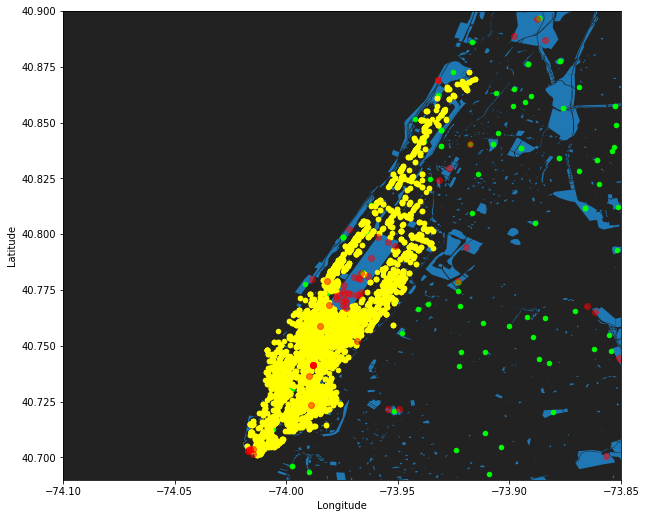

In [191]:
#plot 06/28/2017
ax = parks.plot(figsize=(10, 10))
dpr_eat.plot.scatter("lon", "lat", c="lime", ax=ax)
ax.set_ylim(40.69, 40.9)
ax.set_xlim(-74.1, -73.85)
ax.plot(lons, lats, "o", color="red", alpha=0.5)
restaurant_camera_period.plot.scatter("Longitude", "Latitude", c="yellow", ax=ax)  
ax.set_facecolor("#222222")
# plt.plot(lons, lats, "o", color="red")

In [192]:
# -- read the data
fname = os.path.join("drive", "My Drive", "lwir", "data", "food_truck", "Sidewalk_Caf__Licenses_and_Applications.csv")
cafe = pd.read_csv(fname)
cafe.head()

,LICENSE_NBR,LIC_STATUS,BUSINESS_NAME,BUSINESS_NAME2,BUILDING,STREET,CITY,STATE,ZIP,SWC_TYPE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,DOHMH,LATITUDE,LONGITUDE,COMMUNITY_DISTRICT,CITY_COUNCIL_DISTRICT,CD_URL,APP_ID,APP_SWC_TYPE,APP_SQ_FT,APP_TABLES,APP_CHAIRS,APP_STATUS,APP_STATUS_DATE,EXPIRATION_DATE,APP_TOO_DATE,SUBMIT_DATE,INTAKE,INTAKE_DD,DPQA,SEND_PACKAGE_DD,CP,CP_DD,CB,CB_DD,HEARING,HEARING_DD,HEARING_PUBLIC,HEARING_PUBLIC_DD,CC,CC_DD,MOO,MOO_DD,ISSUANCE,ISSUANCE_DD
0,1190049-DCA,Active,HORSESHOES NY INC.,NaN,611,9TH AVE,NEW YORK,NY,10036,Unenclosed,91.0,4,8,41066767,40.759458,-73.992127,104,3,http://www.nyc.gov/mcb4,26094-2019-RSWC,Unenclosed,91.0,4,8,Pending Review,10/22/2019,01/22/2020,01/22/2020,08/29/2019,Ready For Review,08/29/2019,Issued Temp Op Letter,08/30/2019,Pending Review,08/30/2019,Review Period Expired,10/25/2019,Waived,10/25/2019,NaN,NaN,Pending Review,10/25/2019,Pending Review,NaN,Pending Review,NaN
1,2055726-DCA,Inactive,STARBUCKS CORPORATION,STARBUCKS COFFEE #48340,11,OLD FULTON ST,BROOKLYN,NY,11201,Unenclosed,153.0,6,12,50061502,40.702908,-73.993862,302,33,http://www.nyc.gov/html/bkncb2/html/home/home....,5918-2017-ASWC,Unenclosed,153.0,6,12,Application Review Completed,10/17/2017,09/15/2019,NaN,04/27/2017,Ready For Review,05/01/2017,Approved,05/01/2017,NaN,NaN,Recommend Approval,06/19/2017,Recommendation Issued,07/05/2017,SWC Public Hearing,06/21/2017,Review Period Expired,08/03/2017,NaN,NaN,Issued,10/17/2017
2,2071246-DCA,Active,JOANNIDES GROUP LLC,QUEEN'S ROOM,3602,DITMARS BLVD,ASTORIA,NY,11105,Unenclosed,473.0,16,32,50065639,40.774098,-73.908186,401,22,http://www.nyc.gov/html/qnscb1/html/home/home....,5396-2018-ASWC,Unenclosed,473.0,16,32,Application Review Completed,09/04/2018,09/15/2020,NaN,03/20/2018,Ready For Review,03/20/2018,Approved,03/22/2018,NaN,NaN,Review Period Expired,05/12/2018,Recommendation Issued,05/16/2018,SWC Public Hearing,05/09/2018,Review Period Expired,06/06/2018,Approved,09/04/2018,Issued,09/04/2018
3,2055194-DCA,Active,CRAFT LLC,CRAFT RESTAURANT,43,E 19TH ST,NEW YORK,NY,10003,Unenclosed,289.0,10,20,40873175,40.738173,-73.988998,105,2,http://www.cb5.org,6165-2017-ASWC,Unenclosed,289.0,10,20,Application Review Completed,08/07/2017,12/15/2019,NaN,05/02/2017,Ready For Review,05/02/2017,Approved,05/02/2017,NaN,NaN,Recommend Approval,06/19/2017,Recommendation Issued,06/30/2017,SWC Public Hearing,06/21/2017,Review Period Expired,07/21/2017,Approved,08/07/2017,Issued,08/07/2017
4,1468273-DCA,Active,DE ARMAS ENTERPRISES CORP.,COPPELIA,207,W 14TH ST,NEW YORK,NY,10011,Small Unenclosed,132.0,2,8,41577301,40.738964,-74.000090,104,3,http://www.nyc.gov/mcb4,26571-2019-RSWC,Small Unenclosed,132.0,2,8,Pending Review,09/16/2019,11/23/2019,11/23/2019,09/13/2019,Ready For Review,09/13/2019,Under Review,09/16/2019,Pending Review,09/16/2019,Review Period Expired,11/07/2019,Waived,11/07/2019,NaN,NaN,Pending Review,11/07/2019,Pending Review,NaN,Pending Review,NaN


In [207]:
ind_cafe = cafe["APP_STATUS_DATE"].str.contains("2017")
len(ind_cafe)
ind_cafe_2017 = cafe[ind_cafe]
print("")
ind_cafe_2017["date"] = ind_cafe_2017["APP_STATUS_DATE"].str.replace("/","")
print(ind_cafe_2017)
ind_cafe_2017["month"] = [int(i[:2]) for i in ind_cafe_2017["APP_STATUS_DATE"]]
temp_ind_cafe_2017 = ind_cafe_2017["month"] < 10

#temp_ind_cafe = ind_cafe_2017["date"] > 



      LICENSE_NBR LIC_STATUS  ... ISSUANCE_DD      date
1     2055726-DCA   Inactive  ...  10/17/2017  10172017
3     2055194-DCA     Active  ...  08/07/2017  08072017
19    2054424-DCA   Inactive  ...  07/21/2017  07212017
23    1310960-DCA     Active  ...  11/20/2017  11202017
51    2043836-DCA   Inactive  ...  06/28/2017  06282017
...           ...        ...  ...         ...       ...
1420  1237547-DCA   Inactive  ...  04/19/2017  04192017
1434  2055679-DCA   Inactive  ...  10/03/2017  10032017
1441  2052349-DCA   Inactive  ...  08/02/2017  08022017
1447  2050844-DCA     Active  ...  05/16/2017  05162017
1456  0782318-DCA     Active  ...  12/01/2017  12012017

[139 rows x 48 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
